# Conjunto de datos práctica 4

In [13]:
# Importaciones necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descripcion del dataset
Observaciones diarias (a las 12 del mediodía) de diferentes variables relacionadas con la meteorología durante un período de 3 años (2006-2008):

- *weather label* : el tiempo del día (nublado: 0, lluvioso: 1, soleado: 2).
- *temperature*: temperatura (en grados centígrados).
- *temp app*: sensación térmica (en grados centígrados).
- *humidity*: humedad relativa (en tanto por uno [0-1]).
- *vind vel* : velocidad del viento (en kilómetros por hora).
- *vind dir* : dirección del viento (en grados).
- *visibility*: visibilidad (en kilómetros).
- *atm pres*: presión atmosférica (en milibares).


In [3]:
# Ruta relativa al conjunto de datos
file_path = "./datasets/data_0608.csv"

# Cargamos el archivo en el dataframe
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataframe
print(df)

      weather_label  temperature   temp_app  humidity  wind_vel  wind_dir  \
0                 1    16.061111  16.061111      0.58    4.7817       212   
1                 0    13.816667  13.816667      0.31   20.7690       282   
2                 0    12.288889  12.288889      0.42    7.8890       236   
3                 0    21.111111  21.111111      0.38   23.3289       299   
4                 0    12.172222  12.172222      0.32   30.5739       329   
...             ...          ...        ...       ...       ...       ...   
1091              0    23.861111  23.861111      0.36    7.7280       110   
1092              0    22.838889  22.838889      0.37   10.9319        39   
1093              2    23.861111  23.861111      0.29   15.2950        31   
1094              0    26.038889  26.038889      0.24    9.1609       351   
1095              1    21.855556  21.855556      0.45    0.5957       298   

      visibility  atm_pres  
0         9.9015   1024.37  
1        11.4954 

## Análisis exploratorio de los datos

### 1. Información general del dataframe

In [5]:
# Información general del dataframe 
print("Información general del dataframe")
print(df.info())

# Descripción estadística de las variables numéricas
print("\nDescripción estadística de las variables numéricas")
print(df.describe())

Información general del dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weather_label  1096 non-null   int64  
 1   temperature    1096 non-null   float64
 2   temp_app       1096 non-null   float64
 3   humidity       1096 non-null   float64
 4   wind_vel       1096 non-null   float64
 5   wind_dir       1096 non-null   int64  
 6   visibility     1096 non-null   float64
 7   atm_pres       1096 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 68.6 KB
None

Descripción estadística de las variables numéricas
       weather_label  temperature     temp_app     humidity     wind_vel  \
count    1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean        0.319343    15.484271    14.479268     0.597281    13.641122   
std         0.622434    10.664018    11.910165     0.206462     7.805106   
min     

### 2. Identificar valores faltantes

In [7]:
# Identificar los valores nulos
val_nulos = df.isnull().sum()
val_nulos_ptg = (val_nulos/len(df))*100

# Mostramos los valores nulos
print(pd.DataFrame({"Valores nulos" : val_nulos, "Porcentage (%)" : val_nulos_ptg}))

               Valores nulos  Porcentage (%)
weather_label              0             0.0
temperature                0             0.0
temp_app                   0             0.0
humidity                   0             0.0
wind_vel                   0             0.0
wind_dir                   0             0.0
visibility                 0             0.0
atm_pres                   0             0.0


### 3. Analizar la distribución de la variables numéricas

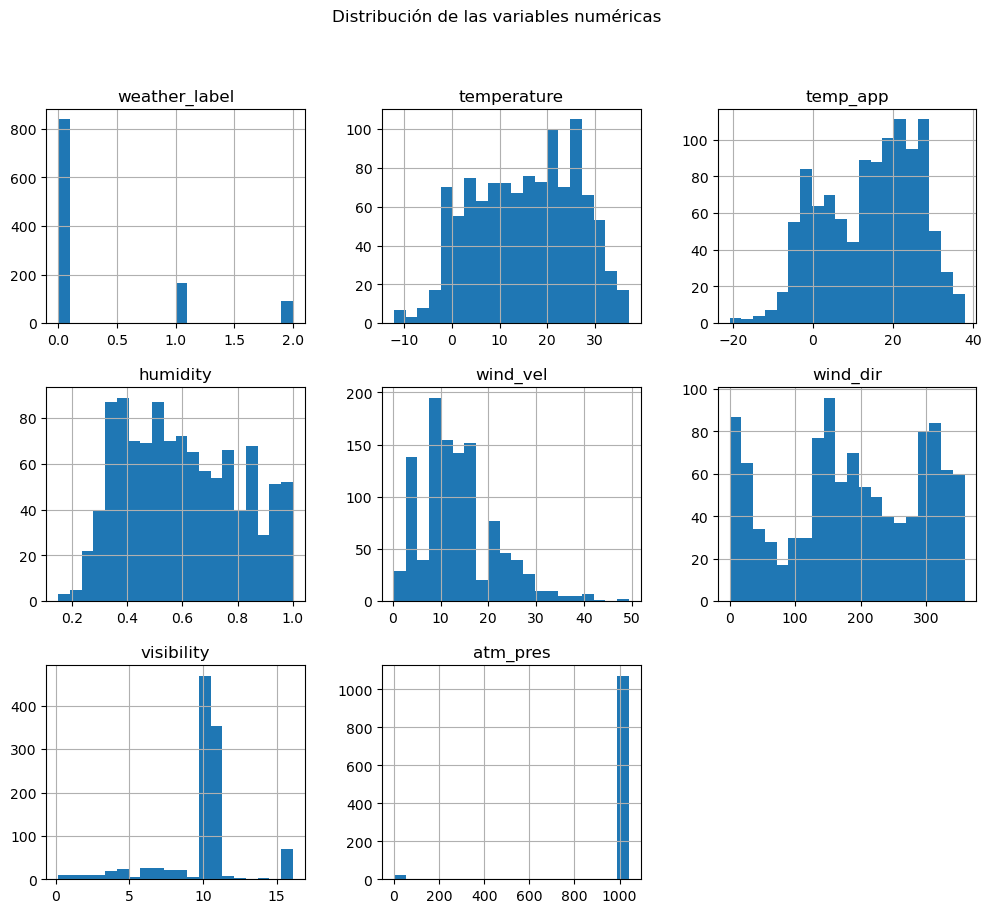

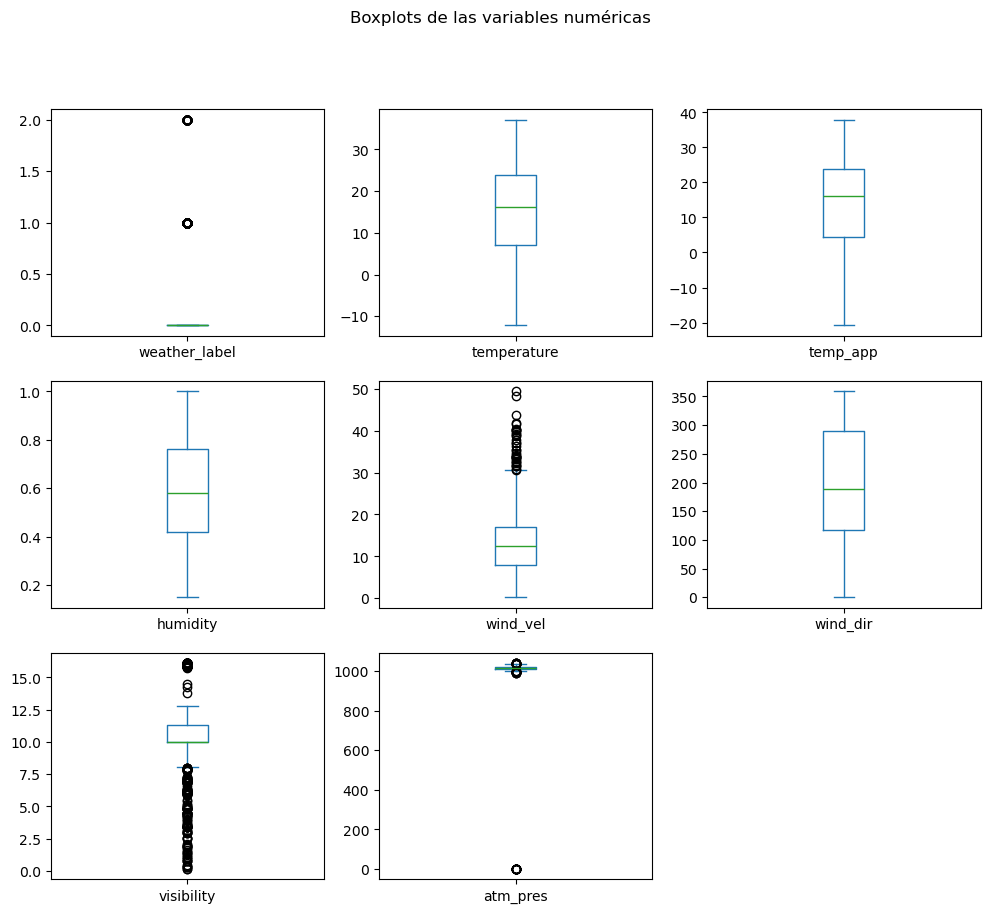

In [10]:
# Histograma de las columnas numéricas
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribución de las variables numéricas")
plt.show()

# Gráfico de bigotes para detectar valores atípicos
df.plot(kind="box", subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False)
plt.suptitle("Boxplots de las variables numéricas")
plt.show()

### 4. Analizar relaciones entre variables

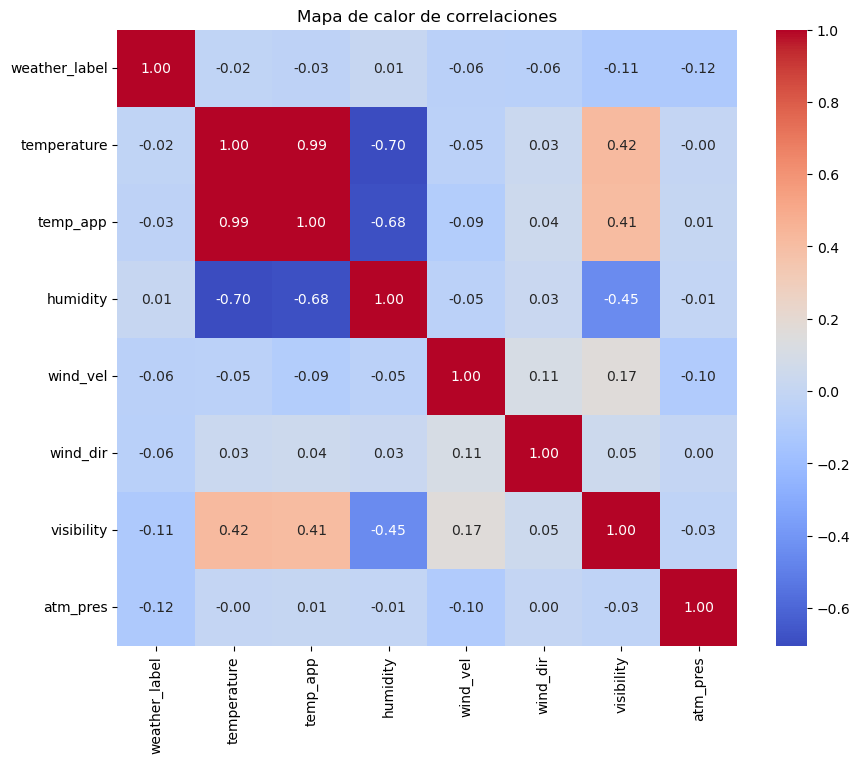

In [14]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

### 5.  Análisis de las variables categóricas
Como no tenemos columnas con variables categóricas podemos obviar el estudio de su distribución

### 6. Detección de outliers

In [16]:
# Detección de outliers basada en el rango intercuartil
for col in df.select_dtypes(include=['Float64', 'Int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 *IQR)) | (df[col] > (Q3 + 1.5 *IQR))]
    print(f"\nOutliers detectados en la columna '{col}' : {len(outliers)}")


Outliers detectados en la columna 'weather_label' : 257

Outliers detectados en la columna 'temperature' : 0

Outliers detectados en la columna 'temp_app' : 0

Outliers detectados en la columna 'humidity' : 0

Outliers detectados en la columna 'wind_vel' : 35

Outliers detectados en la columna 'wind_dir' : 0

Outliers detectados en la columna 'visibility' : 229

Outliers detectados en la columna 'atm_pres' : 48
